# [BERTによる類似文書の検索](https://lab.m-field.co.jp/2020/11/30/search-by-bert/)

## TimeZone

In [ ]:
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Japan /etc/localtime
!date

Tue Jul 20 11:31:18 JST 2021


## 変数設定

In [ ]:
# clients = ["kosfja", "clb", "nu"]
# clients = ["clb"]
# clients = ["nu-chat", "sbd-chat", "ues-chat"]
#clients = ["nu-chat"]
client_id = "aoyama-chat"

In [ ]:
from_date = "2021-01-01"

In [ ]:
#to_date = "2021-03-31"
to_date = "2021-01-31"

In [ ]:
project_id = 'bwing-230309'

## Provide your credentials to the runtime

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

In [ ]:
%load_ext google.colab.data_table

In [ ]:
from google.cloud import bigquery

def query(project_id, client_id, from_date, to_date):
  client = bigquery.Client(project=project_id)

  print((project_id, client_id, from_date, to_date))
  
  df = client.query(f'''
  SELECT
    date,
    app_subdomain AS client,
    content AS text,
    num,
    score,
    magnitude,
    CASE
      WHEN score >= 0.25 THEN 'ポジティブ'
      WHEN score <= -0.25 THEN 'ネガティブ'
      ELSE 'ニュートラル'
    END
    AS sentiment
  FROM
    `bwing-230309.oksky.sentiment`
  WHERE
    app_subdomain = '{client_id}'
    AND date BETWEEN '{from_date}' AND '{to_date}'
  ORDER BY date
  ''').to_dataframe()
  # print(df.head(10))
  return df

In [ ]:
# import os
# import numpy as np
# 
# groups = clients
# 
# texts  = []
# labels = []
# 
# for group in groups:
#     client_id = group
#     df = query(project_id, client_id, from_date, to_date)
# 
#     # for t in df['quest_item_name']:
#     for t in df['text']:
#         if t != []:
#             texts.append(t) 
#             labels.append(group)
# labels = np.array(labels) 

In [ ]:
df = query(project_id, client_id, from_date, to_date)

('bwing-230309', 'aoyama-chat', '2021-01-01', '2021-01-31')


In [ ]:
df.head()

,date,client,text,num,score,magnitude,sentiment
0,2021-01-04,aoyama-chat,あとはストレートなどですよね,1,0.0,0.0,ニュートラル
1,2021-01-04,aoyama-chat,店舗取り置き等、女性スタッフさんに相談してみます,1,0.0,0.0,ニュートラル
2,2021-01-04,aoyama-chat,身長は155センチ、体型は普通くらいです。,1,0.0,0.0,ニュートラル
3,2021-01-04,aoyama-chat,試着したいのですが\nどこの店舗にありますか？,1,0.0,0.0,ニュートラル
4,2021-01-04,aoyama-chat,この商品のファスナーはどちら向きでしょうか？,1,0.0,0.0,ニュートラル


In [ ]:
#print(texts)
#len(texts)
len(df)

2197

In [ ]:
# import pandas as pd
# df = pd.DataFrame(list(zip(labels, texts)), columns = ['client', 'text'])

In [ ]:
# df.head()

## 下準備

In [ ]:
%%bash
# データセットのダウンロード
# wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz
# tar xvzf ldcc-20140209.tar.gz
# ライブラリのインストール
apt install aptitude swig
aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
#pip install mecab-python3==0.996.5
pip install mecab-python3
#pip install unidic-lite nlplot japanize-matplotlib transformers fugashi ipadic
pip install unidic-lite japanize-matplotlib transformers fugashi ipadic
#pip install nlplot==1.2.0

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  l

In [ ]:
%%bash
pip install pandas numpy tqdm seaborn matplotlib wordcloud pillow networkx ipython scikit-learn
pip install plotly>=4.12.0 -U
pip install pyLDAvis==2.1.2
pip install nlplot==1.2.0

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=e7a03a0cf8ab502d9e13baf172391e8078ac1db8bf69dcf34bf21197084281bc
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
!pip install ginza

     |████████████████████████████████| 10.4 MB 25.5 MB/s 
     |████████████████████████████████| 51.5 MB 14 kB/s 
     |████████████████████████████████| 70 kB 10.1 MB/s 
     |████████████████████████████████| 1.0 MB 41.9 MB/s 
     |████████████████████████████████| 473 kB 66.1 MB/s 
  Created wheel for ginza: filename=ginza-4.0.6-py3-none-any.whl size=15793 sha256=07a2012bede2ea23c353c07ce40ab46a2fe74b8ac7efe7781654549f90632d6b
  Stored in directory: /root/.cache/pip/wheels/b9/03/a1/4bd525bb359f897919e88c98c36e890ec27ce8da9c731a1206
  Created wheel for ja-ginza: filename=ja_ginza-4.0.0-py3-none-any.whl size=51530814 sha256=354281c1410f773b2c09c6c57a56f1e11712e13cbdc057ab72978250500991e2
  Stored in directory: /root/.cache/pip/wheels/a8/f5/4a/5d4877342f912e0b7209d8a65e7ce39fe2c1a3c2511d59acfb
  Created wheel for SudachiDict-core: filename=SudachiDict_core-20210608-py3-none-any.whl size=71421461 sha256=41506a43d4b125f25b295e45d33625c4ebb5570f59e6df82f61a4532fea0260e
  Stored in dire

In [ ]:
#!pip install --upgrade plotly

In [ ]:
#!pip install pyLDAvis==2.1.2

In [ ]:
import pkg_resources, imp
imp.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

## データセットの読み込み

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import nlplot
import warnings
warnings.simplefilter('ignore')    
import torch
import transformers
from transformers import BertJapaneseTokenizer
import logging
logging.getLogger("transformers.tokenization_utils_base").setLevel(logging.ERROR) # tokenize時の警告を抑制
# def load_dataset():
#     """データセットの読み込み"""
#     paths = []
#     for dirpath, dirnames, filenames in os.walk('./text'):
#         for file in filenames:
#             if re.match(r'.+[0-9].txt',  file):
#                 #print("{0}".format(file))
#                 paths.append(os.path.join(dirpath, file))                
#     data = {
#         'path': [],
#         'URL': [],
#         'date': [],
#         'title': [],
#         'text': [],
#     }
#     for path in paths:
#         with open(path, 'r') as f:
#             url = f.readline().strip('¥n')
#             date = f.readline().strip('¥n')
#             title = f.readline().strip('¥n')
#             text = f.read()
#             data['path'].append(path)
#             data['URL'].append(url)
#             data['date'].append(date)
#             data['title'].append(title)
#             data['text'].append(text)
#     return pd.DataFrame(data)
# df = load_dataset()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



## 文書の特徴ベクトル化

In [ ]:
#!pip install transformers==3.0.0

In [ ]:
class BertExtractor:
    """文書特徴抽出用クラス"""
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu' #GPUが使用可能ならGPUを使用
        self.model_name = 'cl-tohoku/bert-base-japanese-whole-word-masking' #使用する学習済みモデル名
        self.tokenizer = BertJapaneseTokenizer.from_pretrained(self.model_name) #使用するBERTトークナイザー
        self.bert_model = transformers.BertModel.from_pretrained(self.model_name) #学習済みモデル呼び出し
        self.bert_model = self.bert_model.to(self.device)
        self.max_len = 128 #使用する入力文書の長さ。最大512まで
    
    def extract(self, sentence):
        """文書特徴ベクトルを抽出する"""
        # 文書のトークナイズ
        inp = self.tokenizer.encode(sentence)
        len_inp = len(inp)
        # 入力トークン数の調整
        if len_inp >= self.max_len:
            inputs = inp[:self.max_len]
        else:
            inputs = inp + [0] * (self.max_len - len_inp)
        # モデルへ文書を入力し特徴ベクトルを取り出す
        inputs_tensor = torch.tensor([inputs], dtype=torch.long).to(self.device)        
        seq_out, _ = self.bert_model(inputs_tensor, return_dict=False)
        if torch.cuda.is_available():    
            return seq_out[0][0].cpu().detach().numpy() # 0番目は [CLS] token, 768 dim の文章特徴量
        else:
            return seq_out[0][0].detach().numpy()

In [ ]:
def cos_sim_matrix(matrix):
    """文書間のコサイン類似度を計算し、類似度行列を返す"""
    d = matrix @ matrix.T
    norm = (matrix * matrix).sum(axis=1, keepdims=True) ** .5
    return d / norm / norm.T

In [ ]:
bex = BertExtractor()
df['text_feature'] = df['text'].progress_apply(lambda x: bex.extract(x)) # 文書の特徴ベクトル化
sim = cos_sim_matrix(np.stack(df.text_feature)) # 類似度行列

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## 類似文書の検索

In [ ]:
def search(n=100):
    # doc = df.sample(1)
    doc = df.head(1)
    doc_idx = doc.index[0]
    sim_index = sim[doc_idx].argsort()[::-1]
    rec_df = df.iloc[sim_index][:n]
    rec_df['similarity'] = np.sort(sim[doc_idx])[::-1][:n]
    #return rec_df[['title', 'text', 'similarity']]
    #return rec_df[['client', 'text', 'similarity']]
    return rec_df[['date', 'client', 'text', 'num', 'score', 'magnitude', 'sentiment', 'similarity']]

# df2 = search()
# df2 = search(1000)
df2 = search(len(df))

In [ ]:
len(df2)

2197

## 検索結果の可視化

In [ ]:
#def tokenize(text,):
#    tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
#    wakati_ids = tokenizer.encode(text, return_tensors='pt')
#    tokens = tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist())
#    return tokens[1:-1] #[CLS], [SEP]トークンを除く
#
#df2['tokenized_text'] = df2['text'].progress_apply(tokenize)

In [ ]:
import spacy
import re
nlp = spacy.load('ja_ginza')

def tokenize(text):
    #tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
    #wakati_ids = tokenizer.encode(text, return_tensors='pt')
    #tokens = tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist())
    #return tokens[1:-1] #[CLS], [SEP]トークンを除く
    
    doc =nlp(text)
    tokens = []
    for token in doc:
        # print(np)
        tmp = re.sub(r'^[!-/:-@[-`{-~]$', '', token.lemma_)
        tmp = re.sub(r'^[！-／：-＠［-｀｛-～、-〜”’・ー]$', '', tmp)
        tmp = re.sub(r'^[あ-ん]{1,2}$', '', tmp)
        tmp = re.sub(r'^[\s]+$', '', tmp)
        if tmp:
            tokens.append(tmp)
    return tokens

df2['tokenized_text'] = df2['text'].progress_apply(tokenize)

In [ ]:
!pip install "fugashi[unidic-lite]" 
!pip install ipadic

In [ ]:
# import torch
# from transformers import (
#     pipeline,
#     AutoModelForSequenceClassification,
#     AutoTokenizer
# )
# 
# class NLP:
#     def __init__(self):
#         self.gen_tokenizer = AutoTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking', use_fast=False)
# 
#         #self.model = AutoModelForSequenceClassification.from_pretrained('daigo/bert-base-japanese-sentiment')
#         #self.model = AutoModelForSequenceClassification.from_pretrained('bandainamco-mirai/distilbert-base-japanese')
#         #self.tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
# 
#     def sentiments(self, text: str):
#         if torch.cuda.is_available():
#             nlp = pipeline('sentiment-analysis', model="daigo/bert-base-japanese-sentiment", tokenizer=self.gen_tokenizer, device=0)
#         else:
#             nlp = pipeline('sentiment-analysis', model="daigo/bert-base-japanese-sentiment", tokenizer=self.gen_tokenizer)
#         result = nlp(text)[0]
#         #return f"label: {result['label']}, with score: {round(result['score'], 4)}"
#         #return {"label": result['label'], "score": round(result['score'], 4)}
#         return result

In [ ]:
# from nlp import NLP
# nlp = NLP()
# 
# def sentiments(text):
#     results =nlp.sentiments(text)
# 
#     if results["label"] == 'ネガティブ' and results["score"] > 0.9:
#         return results["label"] 
#     elif results["label"]  == 'ポジティブ' and results["score"] > 0.9:
#         return results["label"] 
#     else:
#         return "ニュートラル"
# 
# #print(sentiments("ケーキ食べ過ぎた、もうだめ。死にたい"))
# df2['sentiment'] = df2['text'].progress_apply(sentiments)

In [ ]:
# print(nlp.sentiments("うほほーい、大好き♡"))

In [ ]:
# print(nlp.sentiments("ケーキ食べ過ぎた、もうだめ。死にたい"))

In [ ]:
df2.head()

,date,client,text,num,score,magnitude,sentiment,similarity,tokenized_text
0,2021-01-04,aoyama-chat,あとはストレートなどですよね,1,0.0,0.0,ニュートラル,1.000000,[ストレート]
69,2021-01-04,aoyama-chat,はけそうですね,1,0.4,0.4,ポジティブ,0.999089,[はける]
243,2021-01-07,aoyama-chat,時間はかかりそうですか？,1,-0.1,0.1,ニュートラル,0.999063,"[時間, かかる]"
2158,2021-01-31,aoyama-chat,他にはありますか？,1,-0.1,0.1,ニュートラル,0.998983,[他]
1566,2021-01-26,aoyama-chat,試着は可能ですか？,1,0.0,0.0,ニュートラル,0.998945,"[試着, 可能]"


In [ ]:
# df2.dropna(subset=['text', 'tokenized_text'], how="all", inplace=True)

In [ ]:
#df2

## [scattertextで文章の単語出現頻度を可視化](https://qiita.com/tchih11/items/e1856225ee611cf1af83)

In [ ]:
!pip install scattertext

     |████████████████████████████████| 7.3 MB 20.4 MB/s 
     |████████████████████████████████| 23.9 MB 95 kB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=010d9233e94efed28203af66e80c8666e69c2181b973d63fcfb4139cdab39e52
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from spacy.lang.ja.stop_words import STOP_WORDS

In [ ]:
import ginza
stopwords = list(STOP_WORDS)
# stopwords.extend(['・', '＿', '、', '。', '?', '？', '。', '、', '(', ')', '（', '）', '・', '「', '」', '『', '』', '：', '〜', '＝', '※', '”', '“', '→', '…', '×', '！', '／', '？', '○', 'ノ', '〈', '〉', '々', '，', '＆', '☆', '―', '＋', 'α', '〒', '《', '》', '‐', '…。', '【', '】', '★', '；', '’', 'β', '（-', '−', '〔', 'μ', '〕', 'ˈ', '＞', '（）', '＜', '́', '――', '．', 'ə', 'ｍ', '［', '］', 'γ', '〇', '■', '●', 'ː', '（=', '＊', '（株）', '△', 'ε', '▲', 'π', 'φ', 'δ', '‘', '−1', 'σ', 'Δ', 'θ', 'λ', '◎', 'ω', '。(', 'Σ', '─', 'ν', 'ɛ', 'ɪ', '（+', 'Ω', 'ノルマン人', 'ρ', '□', '←', 'ゝ', '。}}', 'τ', 'Ａ', '（笑）', '×3', 'κ', 'ɔ', 'η', '＠', '（～', '′', 'ʃ', 'ノルマン', 'Ἀ', '（.', 'ο', '「(', '÷', '「～', 'ʊ', '◆', '（?', '（≒', '（（', 'ζ', '（財）', '↑', 'ι', 'Γ', 'χ', 'محمد', '〇〇', '。!', 'Λ', 'ˌ', 'ʿ', '。-', 'Ｂ', '「-', '（－', '｝', 'Ζ', '◇', 'بن', '£', 'ψ', '（(', 'Φ', '｛', '（’', 'υ', 'ʒ', 'Α', '（社）', '。}}}}', 'ノリス', 'ɾ', 'عبد', 'Ｔ', '。)', 'ɡ', 'əˈ', 'ゞ', 'ｔ', 'ノウサギ', '−2', 'ɣ', 'Π', 'ɒ', '↓', 'ʻ', '︎', '｜', 'Ｃ', 'Ε', '『’', 'Ｆ', 'ξ', 'ɑ', 'Ｍ', 'ノモス', '〆', 'Ｄ', '（”', 'Ζガンダム', 'ʌ', 'Ｈ', 'Ｖ', '￥', 'Ｘ', 'Ｊ', 'ɐ', 'ʁ', 'ɔː', '（有）', '−3', 'Ｅ', '（—', 'ɨ', '（｢', 'Ｓ', 'ʲ', '○×', 'الله', 'ｃｍ', 'ノリッチ'])
# stopwords = []

In [ ]:
stopwords

['かなり',
 'さらに',
 'え',
 'なし',
 'くん',
 'と',
 'ぬ',
 'の',
 'もの',
 'ところ',
 'ほとんど',
 'それぞれ',
 'よく',
 'よれ',
 'あまり',
 'なお',
 'よ',
 'たら',
 'かけ',
 'ぶり',
 'など',
 'やっ',
 'い',
 'ある',
 'もっ',
 'よっ',
 'ま',
 'か',
 'が',
 'しか',
 'より',
 'しまっ',
 'だけ',
 'この',
 'に',
 'つけ',
 'また',
 'そう',
 'だ',
 'いっ',
 'はじめ',
 'および',
 'へ',
 'せる',
 'あり',
 'のち',
 'たち',
 'にて',
 'あるいは',
 'て',
 'ほか',
 'これ',
 'や',
 'よる',
 'ら',
 'いつ',
 'たり',
 'さ',
 'できる',
 'ば',
 'おら',
 'そして',
 'られる',
 'とも',
 'しまう',
 '一',
 'かつて',
 'ち',
 'うち',
 'とっ',
 'する',
 'た',
 'ます',
 'らしい',
 'でき',
 'あっ',
 'そこ',
 'かつ',
 'あ',
 'どう',
 'なっ',
 'なり',
 'です',
 'ない',
 'ひと',
 'なく',
 'ん',
 'その',
 'を',
 'れる',
 'もう',
 'られ',
 'さん',
 'お',
 'いる',
 'べき',
 'すぐ',
 'ごと',
 'こと',
 'いずれ',
 'まで',
 'こ',
 'ご',
 'つ',
 'すべて',
 'ここ',
 'だっ',
 'なかっ',
 'ながら',
 'す',
 'な',
 'き',
 'つつ',
 'しかし',
 'しよう',
 'まま',
 'れ',
 'ちゃん',
 'ただし',
 'つい',
 'おい',
 'せい',
 'いう',
 'せ',
 'なら',
 'は',
 'から',
 'で',
 'おけ',
 'あれ',
 'もと',
 'たい',
 'とき',
 'なけれ',
 'ため',
 'いい',
 'のみ',
 'なる',
 'いく',
 'み',
 'こう',
 'し',
 'ほぼ',
 'いわ',


In [ ]:
import scattertext as st
import spacy
from collections import Counter
from itertools import chain
from IPython.display import HTML
import re

# 品詞を絞りこみつつ、unigramの出現回数を集計
class UnigramSelectedPos(st.FeatsFromSpacyDoc):
    """
    品詞の絞り込みを行い、unigramをカウント
    デフォルトの絞り込み品詞は[固有名詞、名詞、動詞、形容詞、副詞]
    """    
    # def __init__(self,use_pos=['PROPN', 'NOUN', 'VERB', 'ADJ', 'ADV']):
    def __init__(self,use_pos=['PROPN', 'NOUN', 'VERB', 'ADJ']):
        super().__init__()
        self._use_pos = use_pos

    #def get_feats(self, doc):
    #    return Counter([c.lemma_ for c in doc if c.pos_ in self._use_pos])

    def get_feats(self, doc):
        tokens = []
        #for token in doc:
        for c in doc:
            if c.pos_ in self._use_pos:
                # print(np)
                tmp = re.sub(r'^[!-/:-@[-`{-~]$', '', c.lemma_)
                tmp = re.sub(r'^[！-／：-＠［-｀｛-～、-〜”’・ー]$', '', tmp)
                tmp = re.sub(r'^[あ-ん]{1,2}$', '', tmp)
                tmp = re.sub(r'^[a-zA-Z]]{1}$', '', tmp)
                tmp = re.sub(r'^[\s]+$', '', tmp)
                if tmp:
                    tokens.append(tmp)
        #return Counter([c.lemma_ for c in doc if c.pos_ in self._use_pos])
        return Counter(tokens)

In [ ]:
import scattertext as st

nlp = spacy.load('ja_ginza')
corpus = st.CorpusFromPandas(df2, category_col='sentiment', text_col='text', nlp=nlp).build().remove_terms(stopwords, ignore_absences=True)
#corpus = st.CorpusFromPandas(df2, category_col='sentiment', text_col='text', nlp=nlp, feats_from_spacy_doc=UnigramSelectedPos()).build().remove_terms(stopwords, ignore_absences=True)

In [ ]:
html = st.produce_scattertext_explorer(corpus, category='ネガティブ', 
                                       category_name='ネガティブ', 
                                       not_category_name='ニュートラル',
                                       width_in_pixels=1000)


In [ ]:
#open("Dialogue_Sentiment.html", 'wb').write(html.encode('utf-8'))
from IPython.display import HTML
HTML(html)

In [ ]:
html = st.produce_scattertext_explorer(corpus, category='ポジティブ', 
                                       category_name='ポジティブ', 
                                       not_category_name='ニュートラル',
                                       width_in_pixels=1000)

In [ ]:
#open("Dialogue_Sentiment.html", 'wb').write(html.encode('utf-8'))
from IPython.display import HTML
HTML(html)

In [ ]:
html = st.produce_scattertext_explorer(corpus, category='ポジティブ', 
                                       category_name='ポジティブ', 
                                       not_category_name='ネガティブ',
                                       width_in_pixels=1000)

In [ ]:
#open("Dialogue_Sentiment.html", 'wb').write(html.encode('utf-8'))
from IPython.display import HTML
HTML(html)

In [ ]:
npt = nlplot.NLPlot(df2, target_col='tokenized_text')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
#stopwords = npt.get_stopword(top_n=20, min_freq=0)

In [ ]:
# bi-gram表示
npt.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    stopwords=stopwords,
    # save=True
)

100%|██████████| 2197/2197 [00:00<00:00, 18629.22it/s]


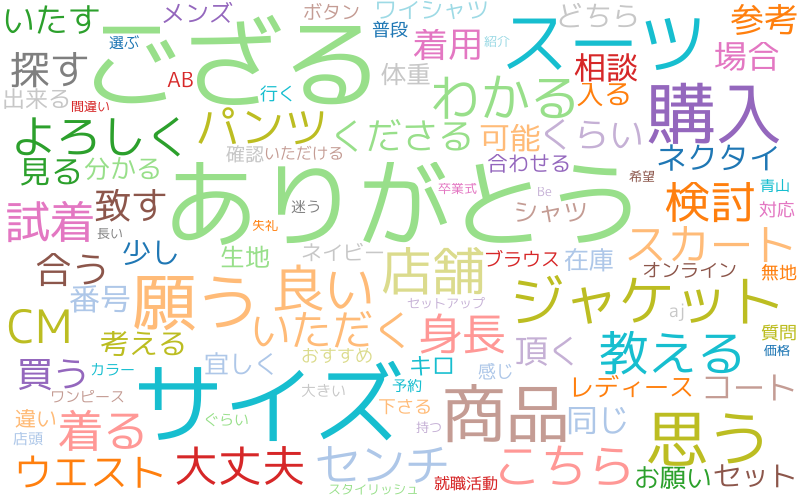

In [ ]:
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
    # save=True
)

# [自然言語を簡単に可視化・分析できるライブラリ「nlplot」を公開しました](https://www.takapy.work/entry/2020/05/17/192947)

## N-gram bar chart

In [ ]:
# 1. N-gram bar chart
npt.bar_ngram(title='uni-gram', ngram=1, top_n=50, stopwords=stopwords, save=True)

100%|██████████| 2197/2197 [00:00<00:00, 31948.54it/s]


In [ ]:
npt.bar_ngram(title='bi-gram', ngram=2, top_n=50, stopwords=stopwords, save=True)

100%|██████████| 2197/2197 [00:00<00:00, 40294.93it/s]


## N-gram tree Map

In [ ]:
# 2. N-gram tree Map
npt.treemap(title='Tree of Most Common Words', ngram=1, top_n=30, stopwords=stopwords, save=True)

100%|██████████| 2197/2197 [00:00<00:00, 42592.69it/s]


## Histogram of the word count

In [ ]:
# 3. Histogram of the word count
npt.word_distribution(title='words distribution', save=True)

## wordcloud

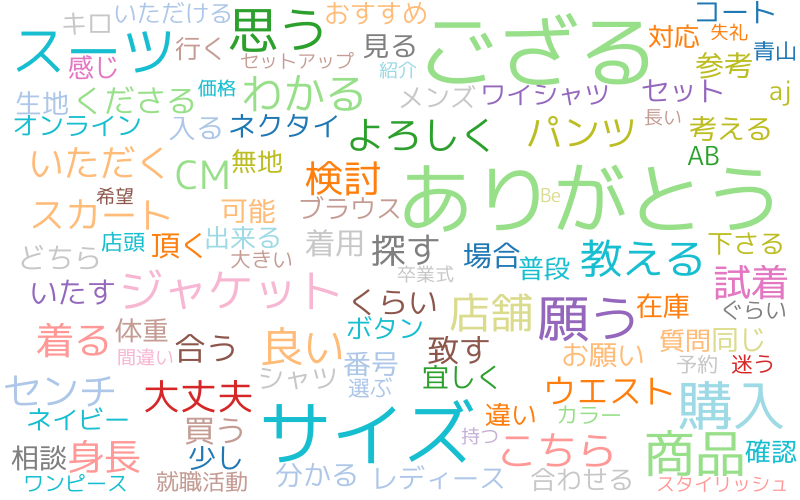

In [ ]:
# 4. wordcloud
npt.wordcloud(stopwords=stopwords, colormap='tab20_r', save=True)

## co-occurrence networks

In [ ]:
# 5. co-occurrence networks
npt.build_graph(stopwords=stopwords, min_edge_frequency=10)

# The number of nodes and edges to which this output is plotted.
# If this number is too large, plotting will take a long time, so adjust the [min_edge_frequency] well.
# >> node_size:70, edge_size:166
npt.co_network(title='Co-occurrence network', save=True)

node_size:96, edge_size:235


## sunburst chart

In [ ]:
# 6. sunburst chart
npt.sunburst(title='sunburst chart', colorscale=True, save=True)

## pyLDAvis

In [ ]:
# 7. pyLDAvis
# If you want to run it in a notebook environment, you need to use the import and magic commands
import pyLDAvis
pyLDAvis.enable_notebook()
npt.ldavis(num_topics=5, passes=5, save=True)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.187441 -0.134257       1        1  26.621805
4      0.082898  0.007684       2        1  22.364075
3     -0.036493  0.129984       3        1  21.977295
2     -0.042250  0.090599       4        1  14.537947
0      0.183286 -0.094010       5        1  14.498878, topic_info=      Term        Freq       Total Category  logprob  loglift
175    ござる  249.000000  249.000000  Default  30.0000  30.0000
174  ありがとう  217.000000  217.000000  Default  29.0000  29.0000
159      私   74.000000   74.000000  Default  28.0000  28.0000
180      号  192.000000  192.000000  Default  27.0000  27.0000
22     サイズ  290.000000  290.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
103     購入   20.282155  232.683909   Topic5  -4.6659  -0.5088
69    ウエスト   13.201859   56.093884   Topic5  -5.0952   0.4844
647      7   12.258523   51.457348   Topic5  -5.1694   0.4966
100    スーツ   13.928254  149.841365   Topic5  -5.0417  -0.4446
184  ジャケット   12.634541  129.537532   Topic5  -5.1392  -0.3964

[363 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2504      5  0.988527  0109
239       2  0.343260    11
239       3  0.164168    11
239       4  0.164168    11
239       5  0.328336    11
...     ...       ...   ...
84        3  0.170105    願う
84        4  0.209360    願う
84        5  0.327125    願う
273       5  0.947648   首回り
556       4  0.867480    高校

[582 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 3, 1])

In [ ]:
!ls -l *.html

-rw-r--r-- 1 root root 3548945 Jul 20 11:36  2021-07-20_bi-gram.html
-rw-r--r-- 1 root root 3608977 Jul 20 11:36 '2021-07-20_Co-occurrence network.html'
-rw-r--r-- 1 root root   59394 Jul 20 11:37  2021-07-20_pyldavis.html
-rw-r--r-- 1 root root 3553646 Jul 20 11:36 '2021-07-20_sunburst chart.html'
-rw-r--r-- 1 root root 3548186 Jul 20 11:36 '2021-07-20_Tree of Most Common Words.html'
-rw-r--r-- 1 root root 3548326 Jul 20 11:36  2021-07-20_uni-gram.html
-rw-r--r-- 1 root root 3551975 Jul 20 11:36 '2021-07-20_words distribution.html'


In [ ]:
%%bash
TODAY=$(date '+%Y-%m-%d')
zip ${TODAY}.zip *.html

  adding: 2021-07-20_bi-gram.html (deflated 70%)
  adding: 2021-07-20_Co-occurrence network.html (deflated 71%)
  adding: 2021-07-20_pyldavis.html (deflated 65%)
  adding: 2021-07-20_sunburst chart.html (deflated 70%)
  adding: 2021-07-20_Tree of Most Common Words.html (deflated 70%)
  adding: 2021-07-20_uni-gram.html (deflated 70%)
  adding: 2021-07-20_words distribution.html (deflated 70%)


In [ ]:
import datetime
from google.colab import files

dt_now = datetime.datetime.now()
today = dt_now.strftime('%Y-%m-%d')

files.download(f"{today}.zip".format(today))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>